<a href="https://colab.research.google.com/github/ZHAbotorabi/Workforce-Analytics-and-Predictive-Modeling/blob/main/Prediction_ML_LogesticRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_preprocessed=pd.read_csv('preprocessedd_1.csv')
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [3]:
data_preprocessed['Absenteeism Time in Hours'].describe()

,Absenteeism Time in Hours
count,700.000000
mean,6.761429
std,12.670082
min,0.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,120.000000


In [4]:
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [5]:
#targets=np.where (data_preprocessed['Absenteeism Time in Hours']>3,1,0)
targets=np.where (data_preprocessed['Absenteeism Time in Hours']
>data_preprocessed['Absenteeism Time in Hours'].median(),1,0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [6]:
data_preprocessed['Execessive Absenteeism']=targets
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Execessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [7]:
targets.shape

(700,)

In [8]:
targets.sum()/targets.shape[0]

0.45571428571428574

In [9]:
data_with_targets= data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)
data_with_targets.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Execessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [10]:
data_with_targets.shape

(700, 15)

In [11]:
#data_with_targets.iloc[:,:14]
data_with_targets.iloc[:,:-1]

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0


In [12]:
unscaled_inputs=data_with_targets.iloc[:,:-1]

In [13]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
absenteeism_scaler=StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin


In [64]:
# the custom scaler class
'''
class CustomScaler(BaseEstimator,TransformerMixin):

    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.array(np.mean(X[self.columns]))
        self.var_ = np.array(np.var(X[self.columns]))
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]
'''

'\nclass CustomScaler(BaseEstimator,TransformerMixin):\n\n    def __init__(self,columns,copy=True,with_mean=True,with_std=True):\n        self.scaler = StandardScaler(copy=True,with_mean=True,with_std=True)\n        self.columns = columns\n        self.mean_ = None\n        self.var_ = None\n\n    def fit(self, X, y=None):\n        self.scaler.fit(X[self.columns], y)\n        self.mean_ = np.array(np.mean(X[self.columns]))\n        self.var_ = np.array(np.var(X[self.columns]))\n        return self\n\n    def transform(self, X, y=None, copy=None):\n        init_col_order = X.columns\n        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)\n        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]\n        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]\n'

In [15]:
unscaled_inputs.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month Value',
       'Day of the week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [16]:
columns_to_scale = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average','Body Mass Index','Children', 'Pets']

In [63]:
#absenteeism_scaler=CustomScaler(columns_to_scale)

## Simple Example:

In [19]:
data= pd.DataFrame({'name':[0,1,1], 'age':[18,92,98], 'weight':[68.5,59.7,49.8]})
data

,name,age,weight
0,0,18,68.5
1,1,92,59.7
2,1,98,49.8


In [20]:
col=['name','age','weight']
features=data[col]

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [22]:
ct=ColumnTransformer([
    ('somename',StandardScaler(), ['age','weight'])], remainder='passthrough')

In [23]:
ct.fit_transform(features)

array([[-1.41100443,  1.2000384 ,  0.        ],
       [ 0.62304092,  0.04800154,  1.        ],
       [ 0.78796352, -1.24803994,  1.        ]])

In [25]:
#data[['age','weight']]=data[['age','weight']].apply(StandardScaler())
numerical=data.select_dtypes(include='float64').columns
numerical

Index(['weight'], dtype='object')

In [26]:
data.loc[:,numerical] = StandardScaler().fit_transform(data.loc[:,numerical])
data

,name,age,weight
0,0,18,1.200038
1,1,92,0.048002
2,1,98,-1.248040


# absenteeism_scaler.fit(unscaled_inputs)

In [27]:

absenteeism_scaler.fit(unscaled_inputs)

StandardScaler()

In [28]:
scaled_inputs=absenteeism_scaler.transform(unscaled_inputs)
scaled_inputs

array([[-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
         0.88046927,  0.26848661],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.91902997, -0.58968976],
       ...,
       [ 1.73205081, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ...,  2.23224237,
        -0.91902997, -0.58968976],
       [-0.57735027, -0.09298136, -0.31448545, ..., -0.44798003,
        -0.01928035,  0.26848661]])

In [29]:
scaled_inputs.shape

(700, 14)

In [30]:
#split
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test =train_test_split(scaled_inputs, targets)

In [32]:
print(X_train.shape, y_train.shape)

(525, 14) (525,)


In [33]:
print(X_test.shape, y_test.shape)

(175, 14) (175,)


In [34]:
X_train,X_test,y_train,y_test =train_test_split(scaled_inputs, targets, train_size =0.8, random_state=20)
# shuffle=True

In [ ]:
print(X_train.shape, y_train.shape)

(560, 14) (560,)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
reg=LogisticRegression()

In [37]:
reg.fit(X_train, y_train)

LogisticRegression()

In [38]:
reg.score(X_train, y_train)

0.7803571428571429

In [82]:
model_outputs_test=reg.predict(X_test)
model_outputs_test

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1])

In [83]:
model_outputs_test==y_test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [80]:
model_outputs_train=reg.predict(X_train)
model_outputs_train

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [81]:
model_outputs_train==y_train

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [89]:
print(np.sum((model_outputs_test==y_test)))
print(model_outputs_test.shape[0])
print(np.sum((model_outputs_test==y_test))/model_outputs_test.shape[0])
print("Accuracy_test = ", np.sum((model_outputs_test==y_test))/model_outputs_test.shape[0]*100,"%")

102
140
0.7285714285714285
Accuracy_test =  72.85714285714285 %


In [88]:
print(np.sum((model_outputs_train==y_train)))
print(model_outputs_train.shape[0])
print(np.sum((model_outputs_train==y_train))/model_outputs_train.shape[0])
print("Accuracy_train = ", np.sum((model_outputs_train==y_train))/model_outputs_train.shape[0]*100,"%")

437
560
0.7803571428571429
Accuracy_train =  78.03571428571429 %


# Explanation of Metrics

## Accuracy:
- **Definition**: Proportion of correctly predicted samples to the total samples.
- **Formula**:
  Accuracy = (TP + TN) / (TP + TN + FP + FN)

## Precision:
- **Definition**: Proportion of true positive predictions out of all positive predictions.
- **Formula**:
  Precision = TP / (TP + FP)

## Recall:
- **Definition**: Proportion of true positive predictions out of all actual positives.
- **Formula**:
  Recall = TP / (TP + FN)

## F1 Score:
- **Definition**: Harmonic mean of precision and recall, providing a single metric for model performance.
- **Formula**:
  F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

## Classification Report:
- **Definition**: Provides a detailed breakdown of precision, recall, and F1-score for each class.

# Confusion Matrix:
[[252  55]  ----->  [TN  FP]

 [ 68 185]] ----->  [FN  TP]

This means:

* 252 true negatives(TN) (class 0 correctly predicted as 0)
* 55 false positives(FP) (class 0 predicted as 1)
* 68 false negatives(FN) (class 1 predicted as 0)
* 185 true positives(TP) (class 1 correctly predicted as 1)

Confusion Matrix_Test Data:
[[56 18]
 [20 46]]


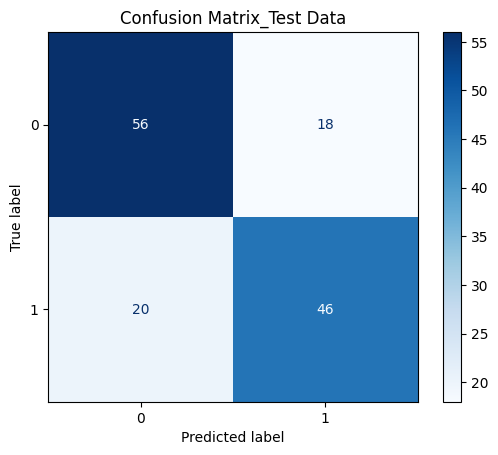


Metrics:
Accuracy: 0.73
Precision: 0.72
Recall: 0.70
F1 Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        74
           1       0.72      0.70      0.71        66

    accuracy                           0.73       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.73      0.73      0.73       140



In [ ]:
# Use the actual labels from your dataset
y_true = y_test  # Replace with y_test if working on test data

# Calculate confusion matrix and metrics using `y_true` and `model_outputs`
confusion_mat = confusion_matrix(y_true, model_outputs_test)

# Display confusion matrix
print("Confusion Matrix_Test Data:")
print(confusion_mat)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix_Test Data")
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_true, model_outputs_test)
precision = precision_score(y_true, model_outputs_test, average='binary')  # For binary classification
recall = recall_score(y_true, model_outputs_test, average='binary')
f1 = f1_score(y_true, model_outputs_test, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, model_outputs_test))


Confusion Matrix_Train Data:
[[252  55]
 [ 68 185]]


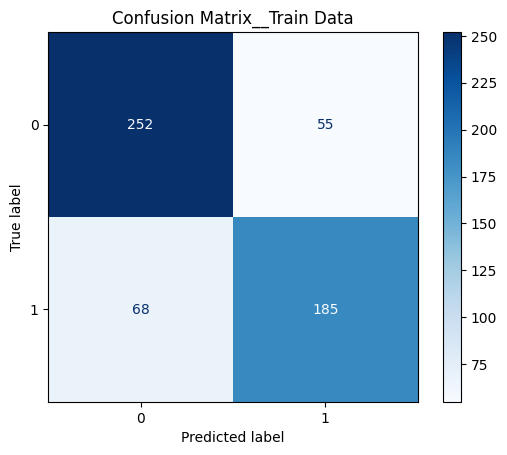


Metrics:
Accuracy: 0.78
Precision: 0.77
Recall: 0.73
F1 Score: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       307
           1       0.77      0.73      0.75       253

    accuracy                           0.78       560
   macro avg       0.78      0.78      0.78       560
weighted avg       0.78      0.78      0.78       560



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Assuming `model_outputs `y_train` are the true labels
y_true = y_train
confusion_mat = confusion_matrix(y_train, model_outputs_train)

# Display Confusion Matrix
print("Confusion Matrix_Train Data:")
print(confusion_mat)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix__Train Data")
plt.show()

# Calculate Metrics
accuracy = accuracy_score(y_train, model_outputs_train)
precision = precision_score(y_train, model_outputs_train, average='binary')  # Use 'binary' for binary classification
recall = recall_score(y_train, model_outputs_train, average='binary')
f1 = f1_score(y_train, model_outputs_train, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Optional: Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_train, model_outputs_train))


In [50]:
reg.intercept_

array([-0.21102398])

In [47]:
reg.coef_

array([[ 2.06986858,  0.33028689,  1.56236468,  1.31054482,  0.02588386,
        -0.08649155,  0.72352943, -0.06072562, -0.2052754 , -0.02828267,
         0.3257168 , -0.16073453,  0.3815691 , -0.32129179]])

In [62]:
#scaled_inputs.columns.values

In [52]:
unscaled_inputs.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month Value',
       'Day of the week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [53]:
feature_name=unscaled_inputs.columns.values

In [54]:
summary_table=pd.DataFrame(columns=['feature_name'], data=feature_name)

In [55]:
summary_table['Coefficient']=np.transpose(reg.coef_)
summary_table

,feature_name,Coefficient
0,reason_1,2.069869
1,reason_2,0.330287
2,reason_3,1.562365
3,reason_4,1.310545
4,Month Value,0.025884
5,Day of the week,-0.086492
6,Transportation Expense,0.723529
7,Distance to Work,-0.060726
8,Age,-0.205275
9,Daily Work Load Average,-0.028283


In [56]:
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept', reg.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,feature_name,Coefficient
0,Intercept,-0.211024
1,reason_1,2.069869
2,reason_2,0.330287
3,reason_3,1.562365
4,reason_4,1.310545
5,Month Value,0.025884
6,Day of the week,-0.086492
7,Transportation Expense,0.723529
8,Distance to Work,-0.060726
9,Age,-0.205275


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(



Feature Importance:
                    Feature  Importance
0                  reason_1    2.069869
2                  reason_3    1.562365
3                  reason_4    1.310545
6    Transportation Expense    0.723529
12                 Children    0.381569
1                  reason_2    0.330287
10          Body Mass Index    0.325717
4               Month Value    0.025884
9   Daily Work Load Average   -0.028283
7          Distance to Work   -0.060726
5           Day of the week   -0.086492
11                Education   -0.160735
8                       Age   -0.205275
13                     Pets   -0.321292


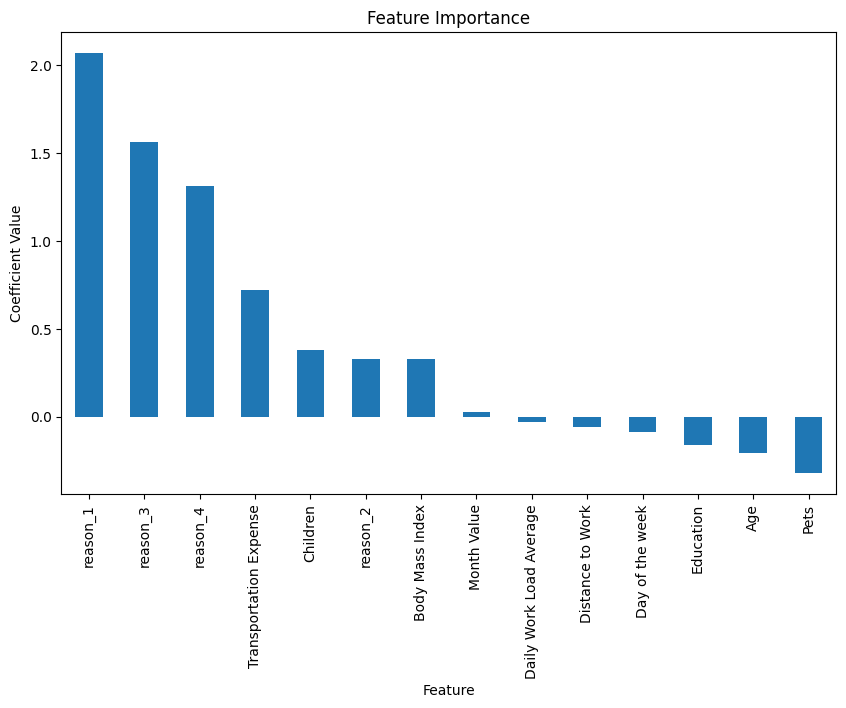

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Define your new data (replace with actual data)
new_data = {
    'reason_1': [1],
    'reason_2': [0],
    'reason_3': [0],
    'reason_4': [0],
    'Month Value': [7],
    'Day of the week': [2],
    'Transportation Expense': [220],
    'Distance to Work': [15],
    'Age': [35],
    'Daily Work Load Average': [265],
    'Body Mass Index': [27],
    'Education': [2],
    'Children': [1],
    'Pets': [0]
}
new_data_df = pd.DataFrame(new_data)

# Predict outcomes and probabilities
predictions = reg.predict(new_data_df)
prediction_probabilities = reg.predict_proba(new_data_df)

# Assuming you have actual labels for evaluation (for new data)
# Replace `y_true` with actual labels if available
y_true = [1]  # Example true labels


# If you have probabilities and true labels, plot ROC Curve
if y_true and len(np.unique(y_true)) == 2:  # Ensure binary classification
    fpr, tpr, thresholds = roc_curve(y_true, prediction_probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Analyze feature importance (optional)
if hasattr(reg, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': new_data_df.columns,
        'Importance': reg.coef_[0]
    }).sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)
    feature_importance.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10, 6))
    plt.title("Feature Importance")
    plt.ylabel("Coefficient Value")
    plt.show()


# Predicting New Data

In [96]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Define the new data as a dictionary (replace values with your actual data)
new_data = {
    'reason_1': [1],
    'reason_2': [0],
    'reason_3': [0],
    'reason_4': [0],
    'Month Value': [7],  # Example month
    'Day of the week': [2],  # Example day (e.g., Tuesday)
    'Transportation Expense': [220],
    'Distance to Work': [15],
    'Age': [25],
    'Daily Work Load Average': [265],
    'Body Mass Index': [27],
    'Education': [2],
    'Children': [1],
    'Pets': [0]
}

# Convert the new data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Ensure the feature columns match the order and preprocessing of your training data
# If you applied scaling or encoding during training, apply it here as well
# Example: scaler.transform(new_data_df) if you used StandardScaler

# Predict using the trained model
predictions = reg.predict(new_data_df)

# Output the prediction
print("Prediction:", predictions)

# For probabilities (optional)
prediction_probabilities = reg.predict_proba(new_data_df)
print("Prediction Probabilities:", prediction_probabilities)


Prediction: [1]
Prediction Probabilities: [[0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
